In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../src")

# Set seeds for reproducible examples

In [2]:
from src.seeded import tf, seed

# Load MURA dataset

In [3]:
from src.MuraLoader import MuraLoader

muraLoader = MuraLoader()
train_set, validation_set, test_set = muraLoader.get_sets(split=0.2, body_part='XR_SHOULDER')

In [4]:
train_set.groupby(['StudyLabel']).size().reset_index(name='counts')

,StudyLabel,counts
0,0,3369
1,1,3334


In [5]:
validation_set.groupby(['StudyLabel']).size().reset_index(name='counts')

,StudyLabel,counts
0,0,842
1,1,834


In [6]:
test_set.groupby(['StudyLabel']).size().reset_index(name='counts')

,StudyLabel,counts
0,0,285
1,1,278


In [7]:
# train_set.groupby('StudyLabel').hist()

In [8]:
train_set.StudyLabel.unique()

array([1, 0])

In [9]:
train_generator, validation_generator, test_generator = muraLoader.get_generators(train_set, validation_set, test_set, batch_size=32)

Creating train generator
Found 6703 validated image filenames.
Creating validation generator
Found 1676 validated image filenames.
Creating test generator
Found 563 validated image filenames.


In [10]:
train_generator_temp = muraLoader.get_generator(train_set)
batch = train_generator_temp.next()
images = batch[0]
categories = batch[1]

# print(images.shape)
# print(categories)

Found 6703 validated image filenames.


In [11]:
display(train_set)
display(validation_set)

,InitialImagePath,ImagePath,Dataset,Type,BodyPart,PatientNo,StudyNo,StudyLabelStr,StudyLabel,ImageFilename
1807,MURA-v1.1/train/XR_SHOULDER/patient00566/study...,train/XR_SHOULDER/patient00566/study2_positive...,MURA-v1.1,train,XR_SHOULDER,patient00566,study2,positive,1,image3.png
744,MURA-v1.1/train/XR_SHOULDER/patient00235/study...,train/XR_SHOULDER/patient00235/study1_positive...,MURA-v1.1,train,XR_SHOULDER,patient00235,study1,positive,1,image4.png
4905,MURA-v1.1/train/XR_SHOULDER/patient01596/study...,train/XR_SHOULDER/patient01596/study1_negative...,MURA-v1.1,train,XR_SHOULDER,patient01596,study1,negative,0,image1.png
5436,MURA-v1.1/train/XR_SHOULDER/patient01761/study...,train/XR_SHOULDER/patient01761/study1_negative...,MURA-v1.1,train,XR_SHOULDER,patient01761,study1,negative,0,image1.png
2475,MURA-v1.1/train/XR_SHOULDER/patient00780/study...,train/XR_SHOULDER/patient00780/study1_positive...,MURA-v1.1,train,XR_SHOULDER,patient00780,study1,positive,1,image1.png
...,...,...,...,...,...,...,...,...,...,...
5310,MURA-v1.1/train/XR_SHOULDER/patient01721/study...,train/XR_SHOULDER/patient01721/study1_negative...,MURA-v1.1,train,XR_SHOULDER,patient01721,study1,negative,0,image4.png
5814,MURA-v1.1/train/XR_SHOULDER/patient01876/study...,train/XR_SHOULDER/patient01876/study1_negative...,MURA-v1.1,train,XR_SHOULDER,patient01876,study1,negative,0,image2.png
2692,MURA-v1.1/train/XR_SHOULDER/patient00855/study...,train/XR_SHOULDER/patient00855/study1_positive...,MURA-v1.1,train,XR_SHOULDER,patient00855,study1,positive,1,image5.png
5043,MURA-v1.1/train/XR_SHOULDER/patient01641/study...,train/XR_SHOULDER/patient01641/study2_negative...,MURA-v1.1,train,XR_SHOULDER,patient01641,study2,negative,0,image4.png


,InitialImagePath,ImagePath,Dataset,Type,BodyPart,PatientNo,StudyNo,StudyLabelStr,StudyLabel,ImageFilename
4735,MURA-v1.1/train/XR_SHOULDER/patient01540/study...,train/XR_SHOULDER/patient01540/study1_negative...,MURA-v1.1,train,XR_SHOULDER,patient01540,study1,negative,0,image2.png
1319,MURA-v1.1/train/XR_SHOULDER/patient00409/study...,train/XR_SHOULDER/patient00409/study1_positive...,MURA-v1.1,train,XR_SHOULDER,patient00409,study1,positive,1,image3.png
1896,MURA-v1.1/train/XR_SHOULDER/patient00599/study...,train/XR_SHOULDER/patient00599/study1_positive...,MURA-v1.1,train,XR_SHOULDER,patient00599,study1,positive,1,image2.png
5800,MURA-v1.1/train/XR_SHOULDER/patient01871/study...,train/XR_SHOULDER/patient01871/study1_negative...,MURA-v1.1,train,XR_SHOULDER,patient01871,study1,negative,0,image4.png
1179,MURA-v1.1/train/XR_SHOULDER/patient00364/study...,train/XR_SHOULDER/patient00364/study1_positive...,MURA-v1.1,train,XR_SHOULDER,patient00364,study1,positive,1,image2.png
...,...,...,...,...,...,...,...,...,...,...
7660,MURA-v1.1/train/XR_SHOULDER/patient02464/study...,train/XR_SHOULDER/patient02464/study1_negative...,MURA-v1.1,train,XR_SHOULDER,patient02464,study1,negative,0,image4.png
5867,MURA-v1.1/train/XR_SHOULDER/patient01894/study...,train/XR_SHOULDER/patient01894/study1_negative...,MURA-v1.1,train,XR_SHOULDER,patient01894,study1,negative,0,image1.png
7649,MURA-v1.1/train/XR_SHOULDER/patient02460/study...,train/XR_SHOULDER/patient02460/study1_negative...,MURA-v1.1,train,XR_SHOULDER,patient02460,study1,negative,0,image2.png
5952,MURA-v1.1/train/XR_SHOULDER/patient01922/study...,train/XR_SHOULDER/patient01922/study1_negative...,MURA-v1.1,train,XR_SHOULDER,patient01922,study1,negative,0,image1.png


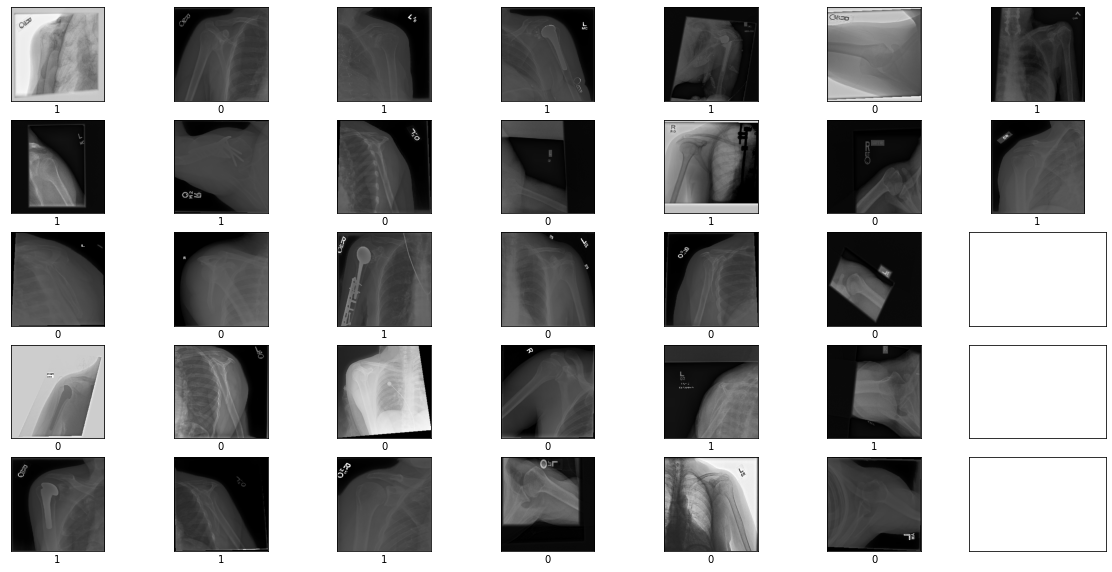

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

def display_mura(images, categories):
    rows = 5
    columns = 7
    fig, axis = plt.subplots(5, 7, figsize=(20, 10), sharex='col', sharey='row')

    for i in range(0, len(images)):
        ax = axis[int(i%5), int(i/5)]
        ax.imshow(images[i], cmap=plt.cm.binary)
        ax.set_xlabel(categories[i])
        
    for i in range(0, rows*columns):
        ax = axis[int(i%5), int(i/5)]
        ax.set_xticks([])
        ax.set_yticks([])
#         ax.axis('off')

display_mura(images, categories)

- https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet
- https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet152

In [13]:
from sklearn.utils import class_weight
import numpy as np
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(train_set['StudyLabel']), y=train_set['StudyLabel'])

In [14]:
class_weights

array([0.99480558, 1.00524895])

https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33


In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding

In [15]:
IMG_SHAPE = (256, 256, 3)

https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d

In [16]:
def custom_cnn_builder(starting_filters= 32, layers = 3, convs_per_layer = 2, batch_norm=True):
    inputs = tf.keras.layers.Input(shape=IMG_SHAPE)
    
    layer = inputs
        
    for conv_level in range(layers):
        current_filters =  starting_filters * (2 ** conv_level)
        for conv_number in range(convs_per_layer):
            layer = tf.keras.layers.Conv2D(filters = current_filters, kernel_size=(3,3), activation='relu', name=f"conv_{conv_level}_{conv_number}")(layer)
            layer = tf.keras.layers.BatchNormalization(name=f"bn_{conv_level}_{conv_number}")(layer)
        
        layer = tf.keras.layers.MaxPool2D(name=f"mp_{conv_level}")(layer)
    
    outputs = tf.keras.layers.Flatten(name="flatten")(layer)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(outputs)
    return tf.keras.models.Model(inputs, outputs, name="custom_cnn")

custom_cnn_model = custom_cnn_builder(starting_filters=32, layers=1, convs_per_layer=1)

In [17]:
from src.models.MuraRunner import MuraRunner

runner = MuraRunner(muraLoader)
runner.run(custom_cnn_model)

Creating train generator
Found 6703 validated image filenames.
Creating validation generator
Found 1676 validated image filenames.
Creating test generator
Found 563 validated image filenames.
Saving Model Summary
Saving Model Plot


AttributeError: 'MuraRunner' object has no attribute '_train_generator'

In [ ]:
custom_cnn_model_history.history

In [ ]:
def run_resnet152v2_model():
    base_model = tf.keras.applications.ResNet152V2(
        include_top=False, 
        weights='imagenet', 
        input_shape=IMG_SHAPE, 
        pooling="max"
    )
    base_model.trainable = False

    prediction_layer = tf.keras.layers.Dense(1, activation="sigmoid", name="resnet_output_softmax_1")

    model = tf.keras.Sequential(
        layers = [
          base_model,
          prediction_layer
        ], 
        name="resnet152v2"
    )

    model = compile(model)


    # len(model.trainable_variables)

    display(model.summary())

    train_generator, validation_generator, test_generator = muraLoader.get_generators(train_set, validation_set, test_set, batch_size=32)
    model , history = fit(model, train_generator, validation_generator,epochs=100)
    
    evaluation = model.evaluate(validation_generator)
    
    predictions = model.predict(test_generator)
    
    return model, history, evaluation, predictions

In [ ]:
resnet_model, resnet_history, evaluation, predictions = run_resnet152v2_model()

In [ ]:
def run_densenet201_model():
    base_model = tf.keras.applications.DenseNet201(
        include_top=False, 
        weights='imagenet', 
        input_shape=IMG_SHAPE, 
        pooling="max"
    )
    
    base_model.trainable = False

    prediction_layer = tf.keras.layers.Dense(1, activation="sigmoid", name="densenet_output_sigmoid_1")

    model = tf.keras.Sequential(layers = [
      base_model,
      prediction_layer
    ], name="densenet201")

    model = compile(model)

    display(model.summary())

    train_generator, validation_generator, test_generator = muraLoader.get_generators(train_set, validation_set, test_set, batch_size=32)
    resnet , history = fit(model, train_generator, validation_generator,epochs=100)
    
    evaluation = model.evaluate(validation_generator)
    
    predictions = model.predict(test_generator)
    
    return model, history, evaluation, predictions

In [ ]:
densenet_model, densenet_history, densenet_evaluation, densenet_predictions = run_densenet201_model()